# Lab One: Exploring Table Data

Team: Brandon Vincitore, Miro Ronac, Kirk Watson

## 1. Business Understanding 

This data can be useful in identifying trends in aviation accidents and assisting the prevention of accidents through pilot education or aircraft technology.

Every year, the National Transportation Safety Board (NTSB) tracks and records details from every aviation accident in the United States and stores the data in a public database to allow for investigation. The focus of the NTSB is to ensure transportation safety and determining probable cause. When an accident occurs, the NTSB is notified and leads to an investigative process which entails on-site fact gathering, determination of probable cause, acceptance of a final report, and upload of details to the public database. The purpose of gathering this information is to allow the NTSB to advocate for the acceptance of safety recommendations that arise from investigations. The dataset utilized in this lab is a snippet of this database which consists of non-commercial aviation accidents that occured in the calendar year of 2019.

According to the dataset being analyzed, there were over 1,000 non-commercial aviation accidents in the United States and 2019 alone. With such a high number of accidents in a dangerous form of transportation, it is important to bring to light common characteristics of aircraft accidents which could help with improving aviation safety.

Ultimately, the ability to identify recurring characteristics of aviation accidents is the intention of analyzing this dataset. With these findings, pilots can understand when and where to expect increased risks during a flight. There could be an underlying pattern in accidents related to aircraft malfunctions or pilot errors. Developing a successful classification algorithm could help with reducing accidents, monetary damages, injuries, and most importantly, fatalities. Discovering accident trends can be utilized in aviation education and improving aircraft technology.

In order to evaluate the success of a machine learning algorithm for this dataset, we must understand the stakeholders. Pilots, passengers, and airport employees are at risk of aircraft accidents and can benefit from safety improvements. In such cases where safety is a priority, it does not hurt to be overly cautious. With this being said, identifying minor or false accident trends could still prove to be helpful for aviation safety. On the other hand, being exceedingly careful could impede on efficiency with procedures and technology. The algorithm must be accurate enough to allow for improvements in safety while maintaining efficiency.

Dataset Source: https://catalog.data.gov/dataset/national-transportation-safety-board-data/resource/4bb4fc29-f747-430e-89b5-b18aadf98edf 

## 2. Data Understanding

### 2.1 Data Description

In [41]:
#importing necessary libraries
import pandas as pd
import cartopy
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

###### Reading in data as Pandas dataframe

In [47]:
df = pd.read_csv('Data_GA.csv')

df.head()

,NTSBNumber,AccidentReport,AccidentDate,City,StateOrRegion,Country,Latitude,Longitude,FatalInjuries,SeriousInjuries,...,DamageLevel,AircraftCategory,RegulationFlightConductedUnder,FlightScheduledType,FlightTerminalType,FlightServiceType,FlightOperationType,DefiningEvent,PhaseOfFlight,IntentionalAct
0,GAA19CA118,AccidentReport,1/2/19,Appleton,Minnesota,United States,45.227500,-96.004447,NaN,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Loss of Control on Ground,Landing,NaN
1,GAA19CA124,AccidentReport,1/2/19,Santa Maria Island,Florida,United States,27.500000,-82.746665,NaN,1.0,...,Substantial,Helicopter,Part 91: General aviation,NaN,NaN,NaN,Aerial observation,Loss of Control In-Flight,Maneuvering,NaN
2,WPR19LA054,AccidentReport,1/2/19,Sacramento,California,United States,38.600833,-121.503334,1.0,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Abnormal Runway Contact,Landing,NaN
3,WPR19LA055,AccidentReport,1/2/19,Townsend,Montana,United States,46.289165,-111.519447,NaN,2.0,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Low Altitude Operation,Maneuvering,NaN
4,ERA19LA085,AccidentReport,1/3/19,Wilkes-Barre,Pennsylvania,United States,41.000000,-75.000000,NaN,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Fuel Related,Approach,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NTSBNumber                      1234 non-null   object 
 1   AccidentReport                  1234 non-null   object 
 2   AccidentDate                    1234 non-null   object 
 3   City                            1234 non-null   object 
 4   StateOrRegion                   1214 non-null   object 
 5   Country                         1234 non-null   object 
 6   Latitude                        1231 non-null   float64
 7   Longitude                       1231 non-null   float64
 8   FatalInjuries                   289 non-null    float64
 9   SeriousInjuries                 231 non-null    float64
 10  HighestInjuryLevel              1234 non-null   object 
 11  AircraftNumber                  1234 non-null   int64  
 12  DamageLevel                     12

The info about shows that the data has a total of 1234 entries/accidents, 289 Fatal Injuries, and 231 Serious Injuries.

In [49]:
df['AircraftCategory'].unique()

array(['Airplane', 'Helicopter', 'Weight-shift', 'Balloon',
       'Powered parachute', 'Gyroplane', 'Glider'], dtype=object)

Listed above are all the different aircraft categories covered in this dataset. Later we will explore which of these categories is the most risky and deadly.

In [50]:
df['PhaseOfFlight'].unique()

array(['Landing', 'Maneuvering', 'Approach', 'Initial Climb', 'Enroute',
       'Taxi', 'Standing', 'Takeoff', 'Unknown', 'Emergency Descent',
       'Uncontrolled Descent'], dtype=object)

Listed above are all the different phases of flights that these accidents have occured in. Like Aircraft Category we will be exploring the Phase of Flight and finding which phase is the most risky and deadly.

### 2.2 Data Quality

Given that this dataset comes from a well-maintained database, the formatting of text is consistent.

However, there are some table attributes that contain missing values as shown in the visual below.

Text(0.5, 1.0, 'Not Sorted')

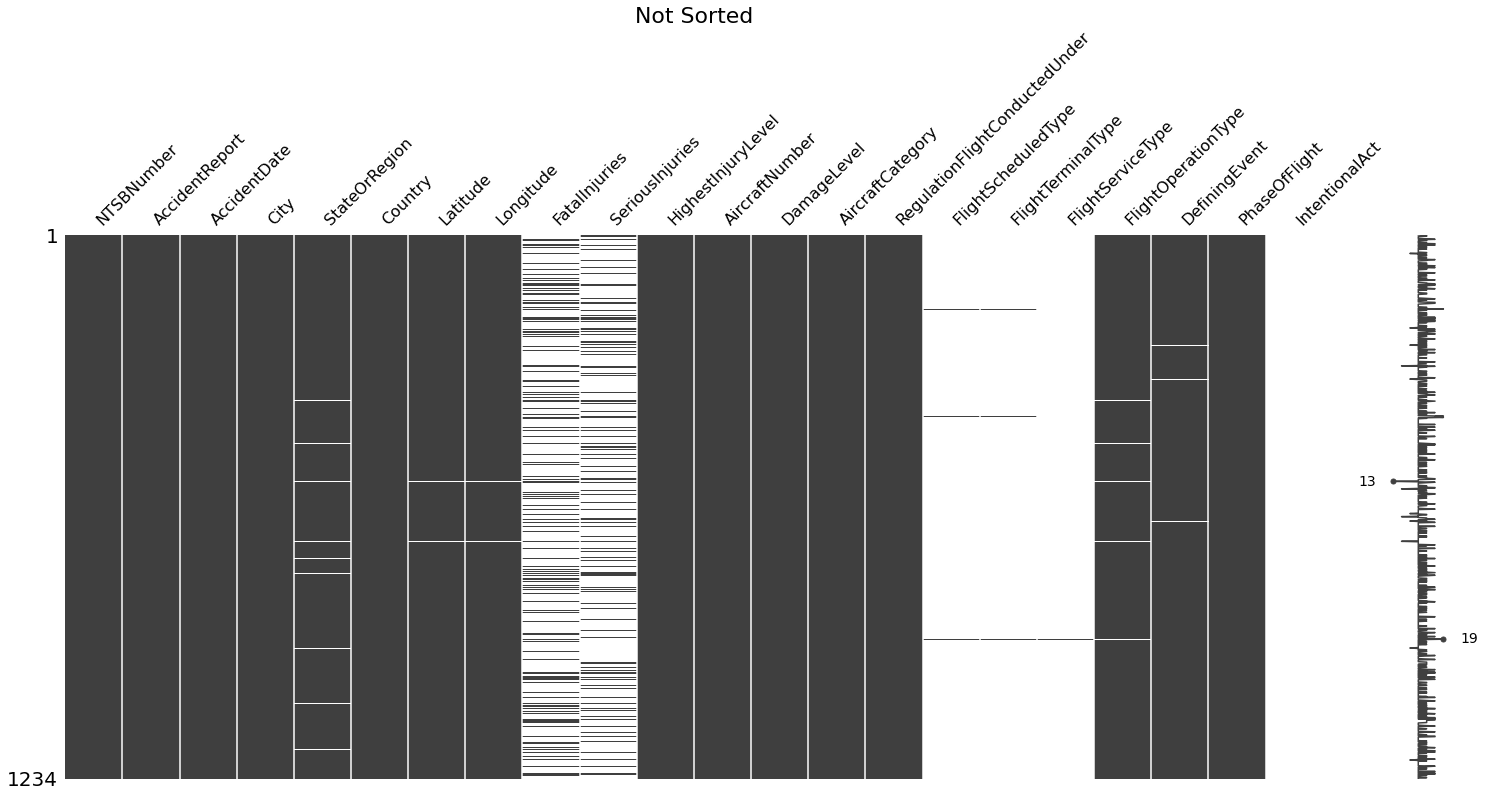

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

When looking at the FatalInjuries and SeriousInjuries columns, there is a considerable amount of missing data. These missing data values actually represent zero. For example, if an accident has no value for FatalInjuries, we can interpret that as zero fatal injuries. To make that clear, we will impute these values to 0.

There are a few empty values in the StateOrRegion column. In these instances, the Country value is outside of the United States resulting in the StateOrRegion value not needed to be recorded. However, the accidents outside of the United States are out of the scope of this analsys, so they will be removed.

There are also a few empty values in the FlightOperationType, DefiningEvent, Latitude, and Longitude columns. There are very few instances that are missing this values, so it won't take away from the quality of the dataset if they are removed. In addition, these values are unique characteristics that would be difficult to be imputed.

Using the unique NTSBNumber for each accident, we can search for duplicates and remove them from the dataset.

We will remove empty columns which include: FlightScheduledType, FlightTerminalType, FlightServiceType, and IntentionalAct. These columns were most likely associated with commericals flights which this dataset does not have.

We will also remove columns that are not useful for our analyses which include:  NTSBNumber, AccidentReport, and RegulationFlightConductedUnder.

In [53]:
# Make NaN values 0
df.FatalInjuries = df.FatalInjuries.fillna(0)
df.SeriousInjuries = df.SeriousInjuries.fillna(0)

#remove duplicates
df=df.drop_duplicates(subset=['NTSBNumber'], keep="first")

#remove rows outside of the united states
df=df[(df.Country == 'United States') & (~df.StateOrRegion.isnull())]

#remove rows with null values
df=df[(~df.FlightOperationType.isnull()) & (~df.DefiningEvent.isnull())]

#remove empty and non-useful columns
for col in ['FlightScheduledType','FlightTerminalType','FlightServiceType','IntentionalAct','NTSBNumber','AccidentReport','RegulationFlightConductedUnder']:
    if col in df:
        del df[col]

## 3. Data Visualization

### 3.1 Data Exploration

#### 3.1.1 Displaying all the data on a map

<IPython.core.display.Javascript object>


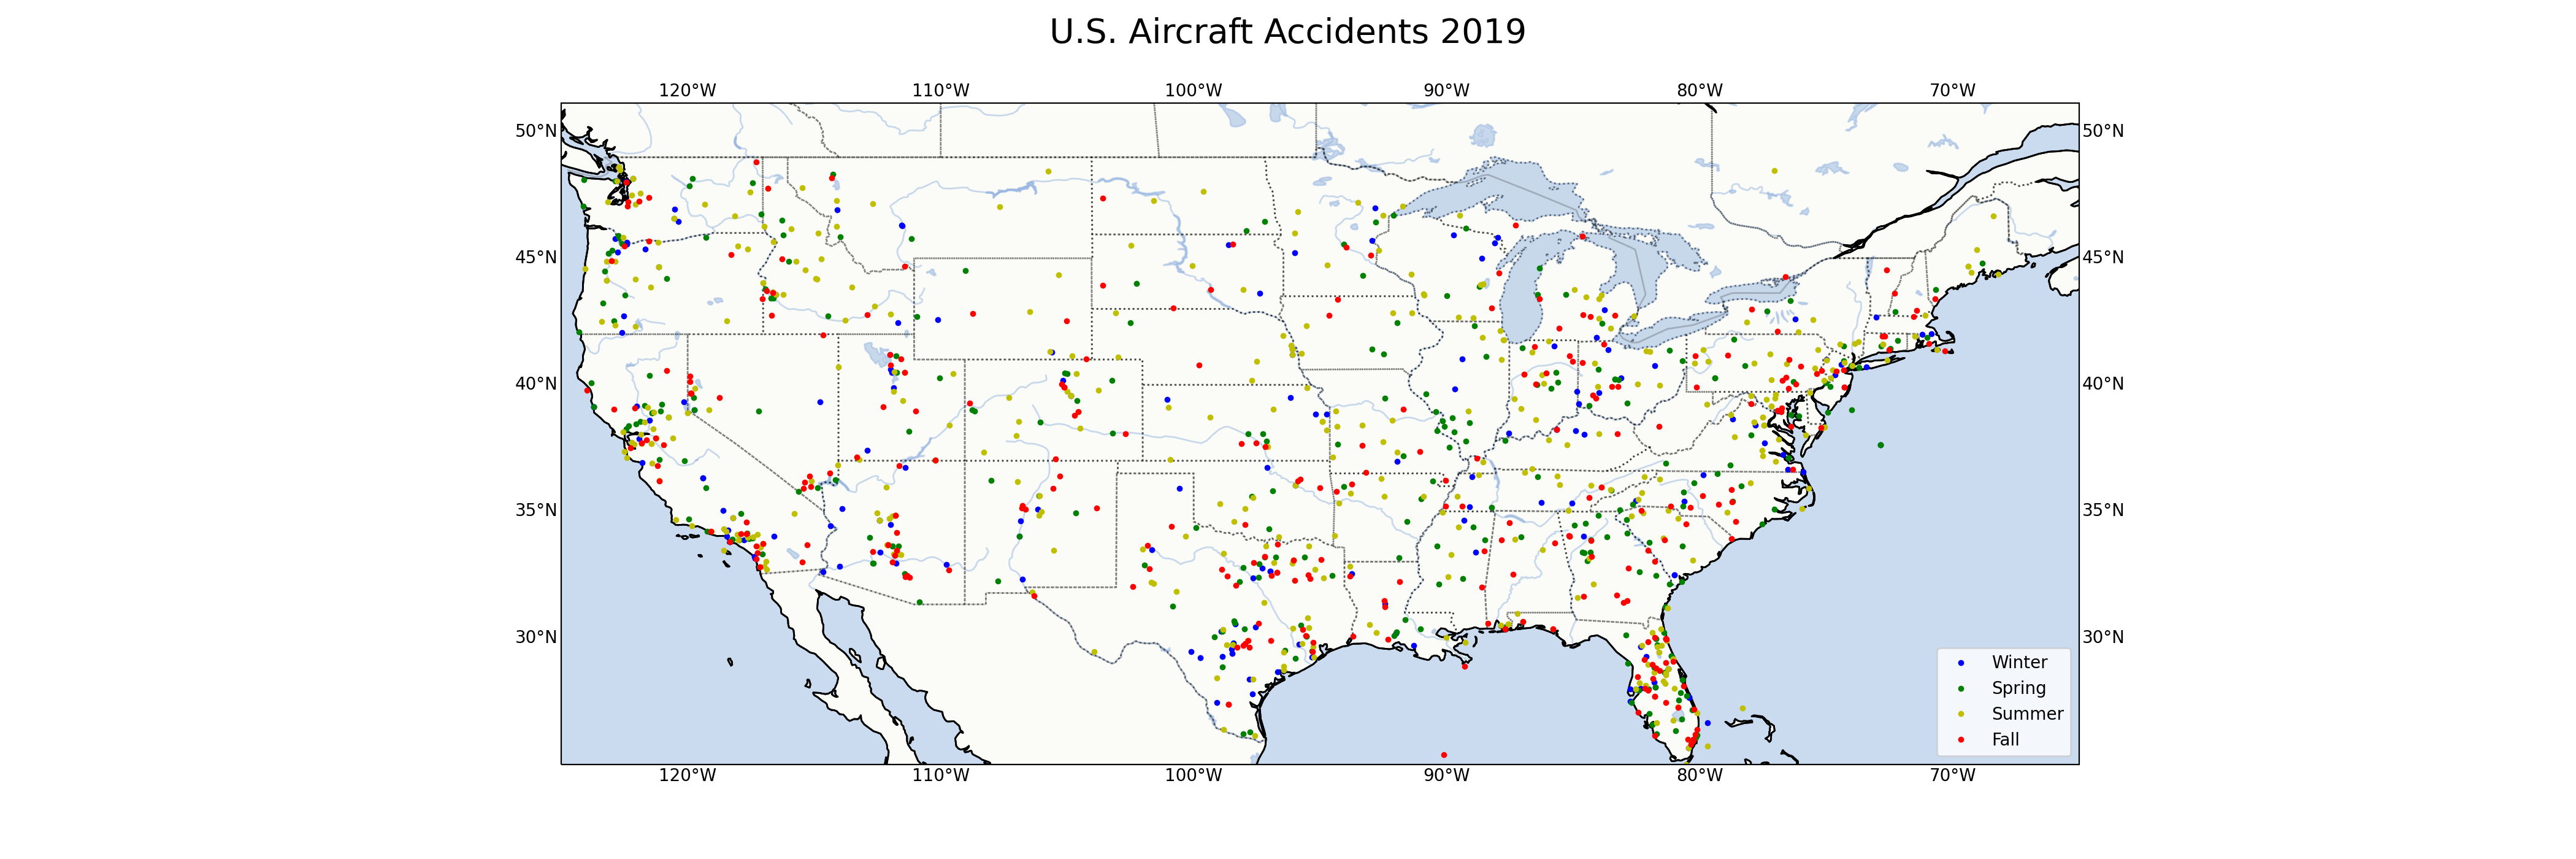

Text(0.5, 0.98, 'U.S. Aircraft Accidents 2019')

In [29]:
%matplotlib notebook
projection = ccrs.PlateCarree(); transform=ccrs.Geodetic()
fig = plt.figure(figsize=(21,7))
ax = plt.axes(projection=projection)

months = np.zeros((len(df), 1))
for i in range(len(df)):
    try:    
        x = int(df.AccidentDate[i][0] + df.AccidentDate[i][1])
    except:
        x = int(df.AccidentDate[i][0])
    months[i,0] = x

# Winter
winter_1 = np.where(months >= 12)[0]; winter_2 = np.where(months <= 2)[0] 
ax.plot(df.Longitude[i], df.Latitude[i], 'ob', transform=transform, markersize=2.5, label='Winter')
for i in winter_1:
    ax.plot(df.Longitude[i], df.Latitude[i], 'ob', transform=transform, markersize=2.5)
for j in winter_2:
    ax.plot(df.Longitude[j], df.Latitude[j], 'ob', transform=transform, markersize=2.5)
winter = np.hstack((winter_1, winter_2))

# Spring
spring = np.where((months >= 3) & (months <= 5))[0]
ax.plot(df.Longitude[i], df.Latitude[i], 'og',transform=transform, markersize=2.5, label='Spring')
for i in spring:
    ax.plot(df.Longitude[i], df.Latitude[i], 'og', transform=transform, markersize=2.5)
    
# Summer
summer = np.where((months >= 6) & (months <= 8))[0]
ax.plot(df.Longitude[summer[0]], df.Latitude[summer[0]], 'oy', transform=transform, markersize=2.5, label='Summer')
for i in summer:
    ax.plot(df.Longitude[i], df.Latitude[i], 'oy', transform=transform, markersize=2.5)

# Fall
fall = np.where((months >= 9) & (months <= 11))[0]
ax.plot(df.Longitude[fall[0]], df.Latitude[fall[0]], 'or', transform=transform, markersize=2.5, label='Fall')
for i in fall:
    ax.plot(df.Longitude[i], df.Latitude[i], 'or', transform=transform, markersize=2.5)

    
ax.coastlines()
extent = (-125,-65, 47.5,25)
ax.set_extent(extent, crs=ccrs.Geodetic())
gl = ax.gridlines(crs=projection, draw_labels=True, linewidth=0)

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS, alpha=0.5)
ax.add_feature(cartopy.feature.OCEAN, alpha=0.5)

ax.add_feature(cartopy.feature.STATES, alpha=0.5, ls=':')
ax.add_feature(cartopy.feature.BORDERS, alpha=0.2)
ax.add_feature(cartopy.feature.LAND, alpha=0.2)
ax.add_feature(cartopy.feature.COASTLINE)

plt.legend(loc='lower right')
plt.suptitle('U.S. Aircraft Accidents 2019', fontsize=20)

Map plots locations of aircraft accidents as a function of season. There is no clear seasonal variation discernable in the figure. However, it is evident that accidents appear to be more heavily concentrated in cities (e.g., Los Angeles, San Francisco, New York City). Florida appears to have the highest number of accidents proportional to its surface area.

## 3.2 Data Relationship Exploration

### 3.2.1 Assessing seasonal injury rates

<IPython.core.display.Javascript object>


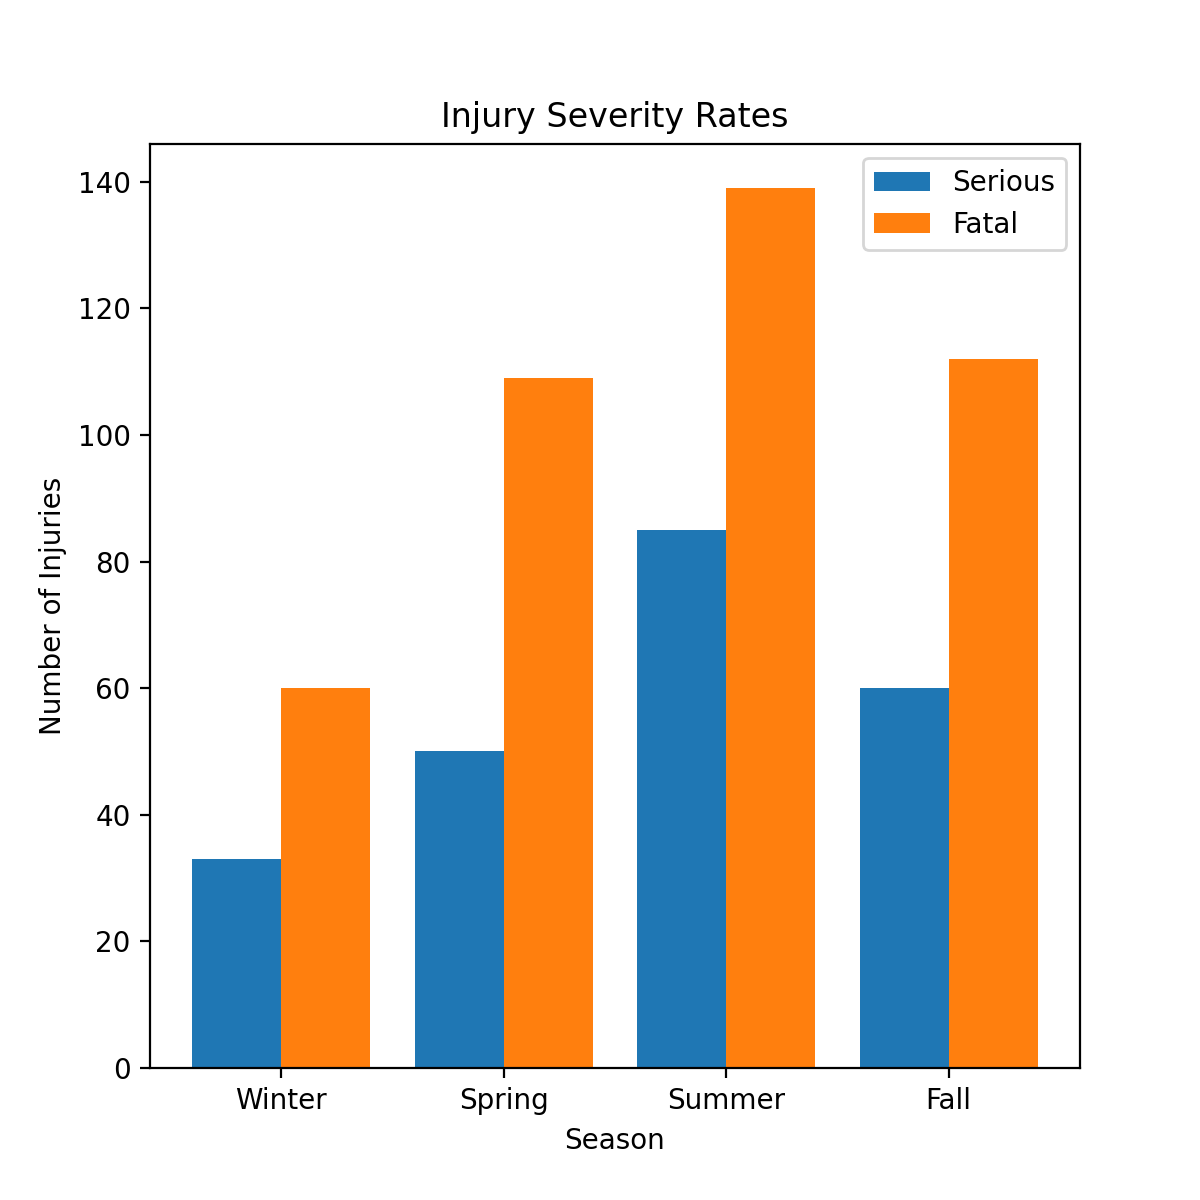

Text(0.5, 1.0, 'Injury Severity Rates')

In [30]:
%matplotlib notebook
# Make NaN values 0
df.FatalInjuries = df.FatalInjuries.fillna(0)

fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot(1,1,1)

season = ['Winter', 'Spring', 'Summer', 'Fall']
x_axis = np.arange(len(season))

serious = [df.SeriousInjuries[winter].sum(), df.SeriousInjuries[spring].sum(), df.SeriousInjuries[summer].sum(), df.SeriousInjuries[fall].sum()]
fatal = [df.FatalInjuries[winter].sum(), df.FatalInjuries[spring].sum(), df.FatalInjuries[summer].sum(), df.FatalInjuries[fall].sum()]
plt.bar(x_axis-0.2, serious, 0.4, label='Serious')
plt.bar(x_axis+0.2, fatal, 0.4, label='Fatal')
plt.xticks(x_axis, season)
plt.xlabel('Season'); plt.ylabel('Number of Injuries')
plt.legend(loc='upper right')
plt.title('Injury Severity Rates')

The bar chart above does show differences in accident and severity rates throughout the seasons. Summer is the highest in Serious and Fatal injuries compared to other seasons. Although, we believe this is due to the increase in the number of overall flights flown in the Summer and not weather conditions.


### 3.2.2 Assessing injury rates as a function of aircraft

<IPython.core.display.Javascript object>


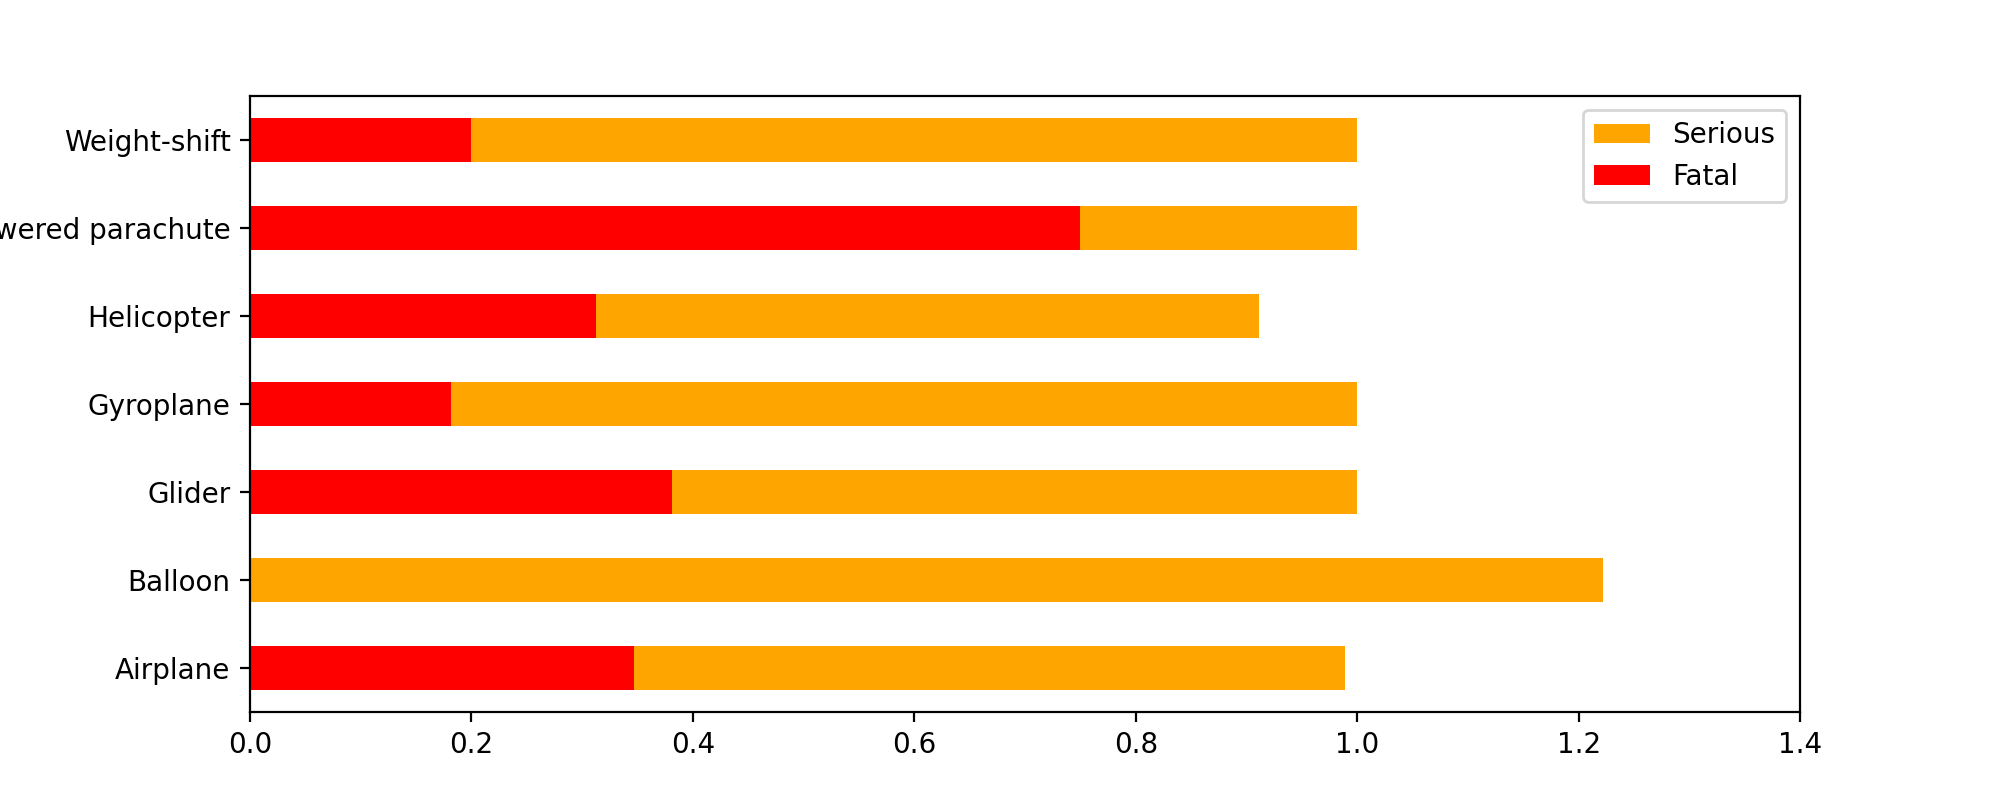

In [45]:
%matplotlib notebook
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,1,1)

# first group the data
df_grouped = df.groupby(by=['AircraftCategory'])
# df_grouped.FatalInjuries = df_grouped.FatalInjuries.fillna(0)

# tabulate mortality rates of each group
serious = df_grouped.SeriousInjuries.sum() / df_grouped.SeriousInjuries.count()
fatal = df_grouped.FatalInjuries.sum() / df_grouped.FatalInjuries.count()

# show in a bar chart using builtin pandas API
serious.plot(kind='barh', color='orange', label='Serious')
fatal.plot(kind='barh', color='red', label='Fatal')
plt.xlim([0,1.4])
plt.legend(loc='upper right')

Aircraft Category, each with their Injury Percentages, showed that the Powered parachute has the highest fatality rate. The glider came in second, and Airplanes came in a close Third. While Balloons had no fatalities, they did have the highest serious injury percentage. We think this is due to the slow speed at which balloons operate, resulting in a non-fatal impact most of the time.

### 3.2.3 Assessing injury rates as a function of phase of flight

<IPython.core.display.Javascript object>


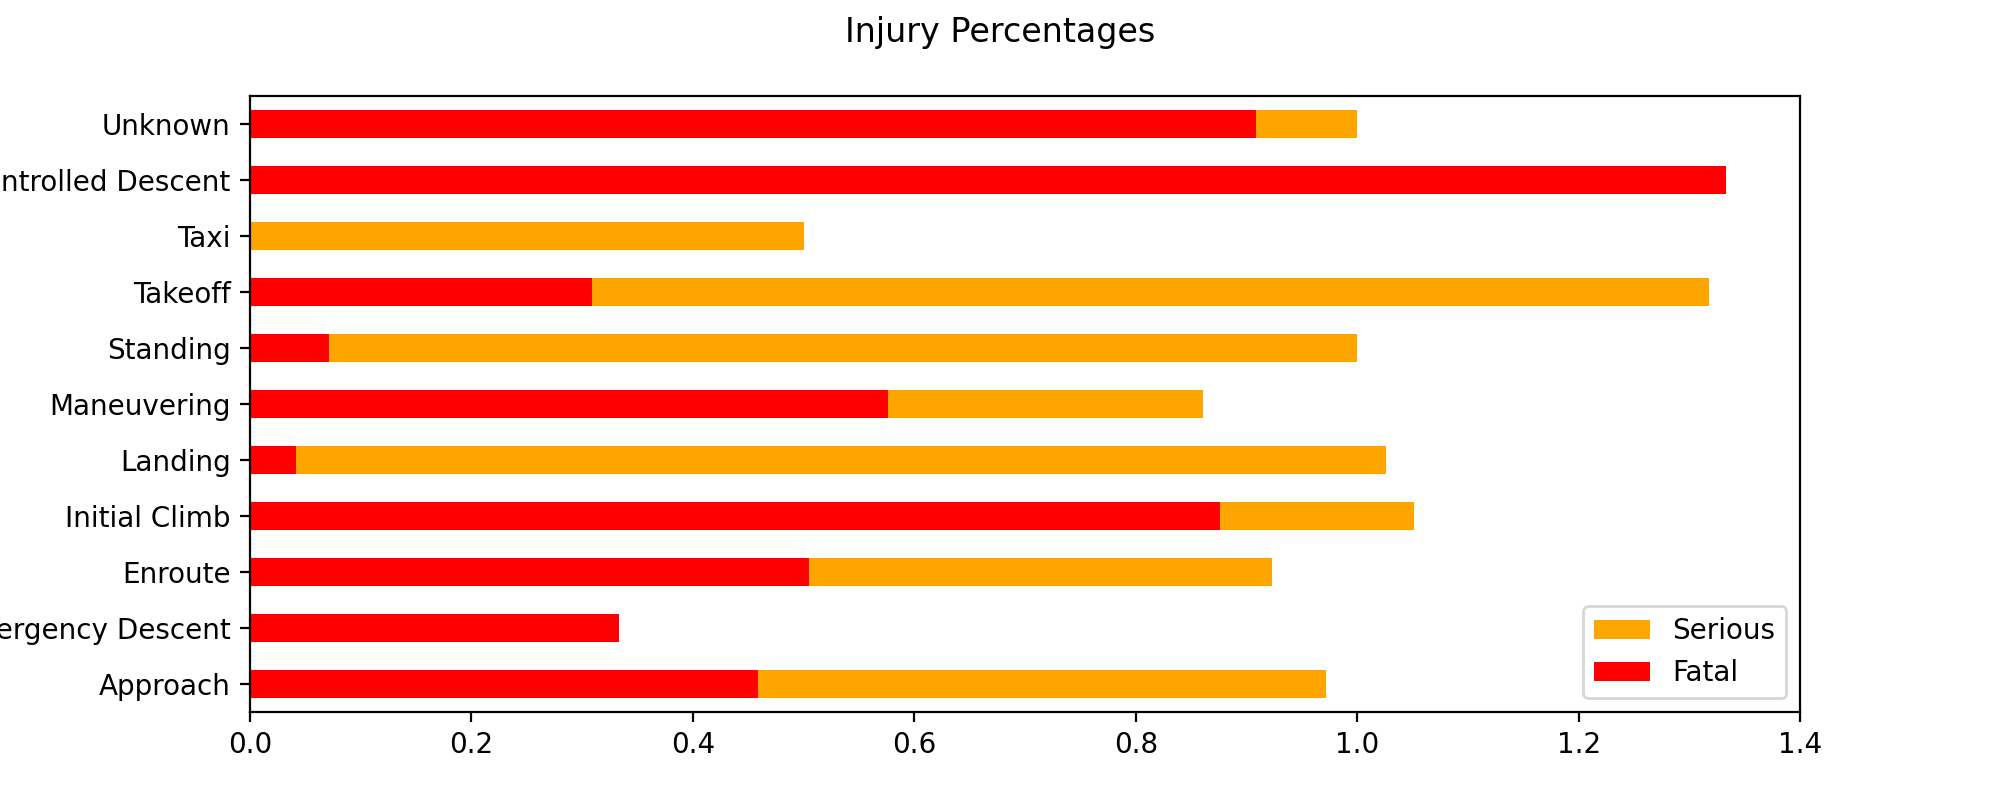

Text(0.5, 0.98, 'Injury Percentages')

In [46]:
%matplotlib notebook
fig = plt.figure(figsize=(10,4))
ax2 = fig.add_subplot(1,1,1, sharex=ax1)

# first group the data
df_grouped = df.groupby(by=['PhaseOfFlight'])
# df_grouped.FatalInjuries = df_grouped.FatalInjuries.fillna(0)

# tabulate mortality rates of each group
serious = df_grouped.SeriousInjuries.sum() / df_grouped.SeriousInjuries.count()
fatal = df_grouped.FatalInjuries.sum() / df_grouped.FatalInjuries.count()

# show in a bar chart using builtin pandas API
# df_grouped.plot(kind='barh')
serious.plot(kind='barh', color='orange', label='Serious')
fatal.plot(kind='barh', color='red', label='Fatal')
plt.legend(loc='lower right')

plt.suptitle('Injury Percentages')

The Phase of Flight that demonstrated the highest fatal injury percentage was an Uncontrolled Descent. An Uncontrolled Descent is most likely when a pilot stalls the airplane and enters it into an uncontrollable spiral spin towards the ground. The second highest was in an unknown phase of flight, and the third highest was on the initial climb. This graph is essential for pilots to look at and understand when most accidents happen while flying.

<IPython.core.display.Javascript object>


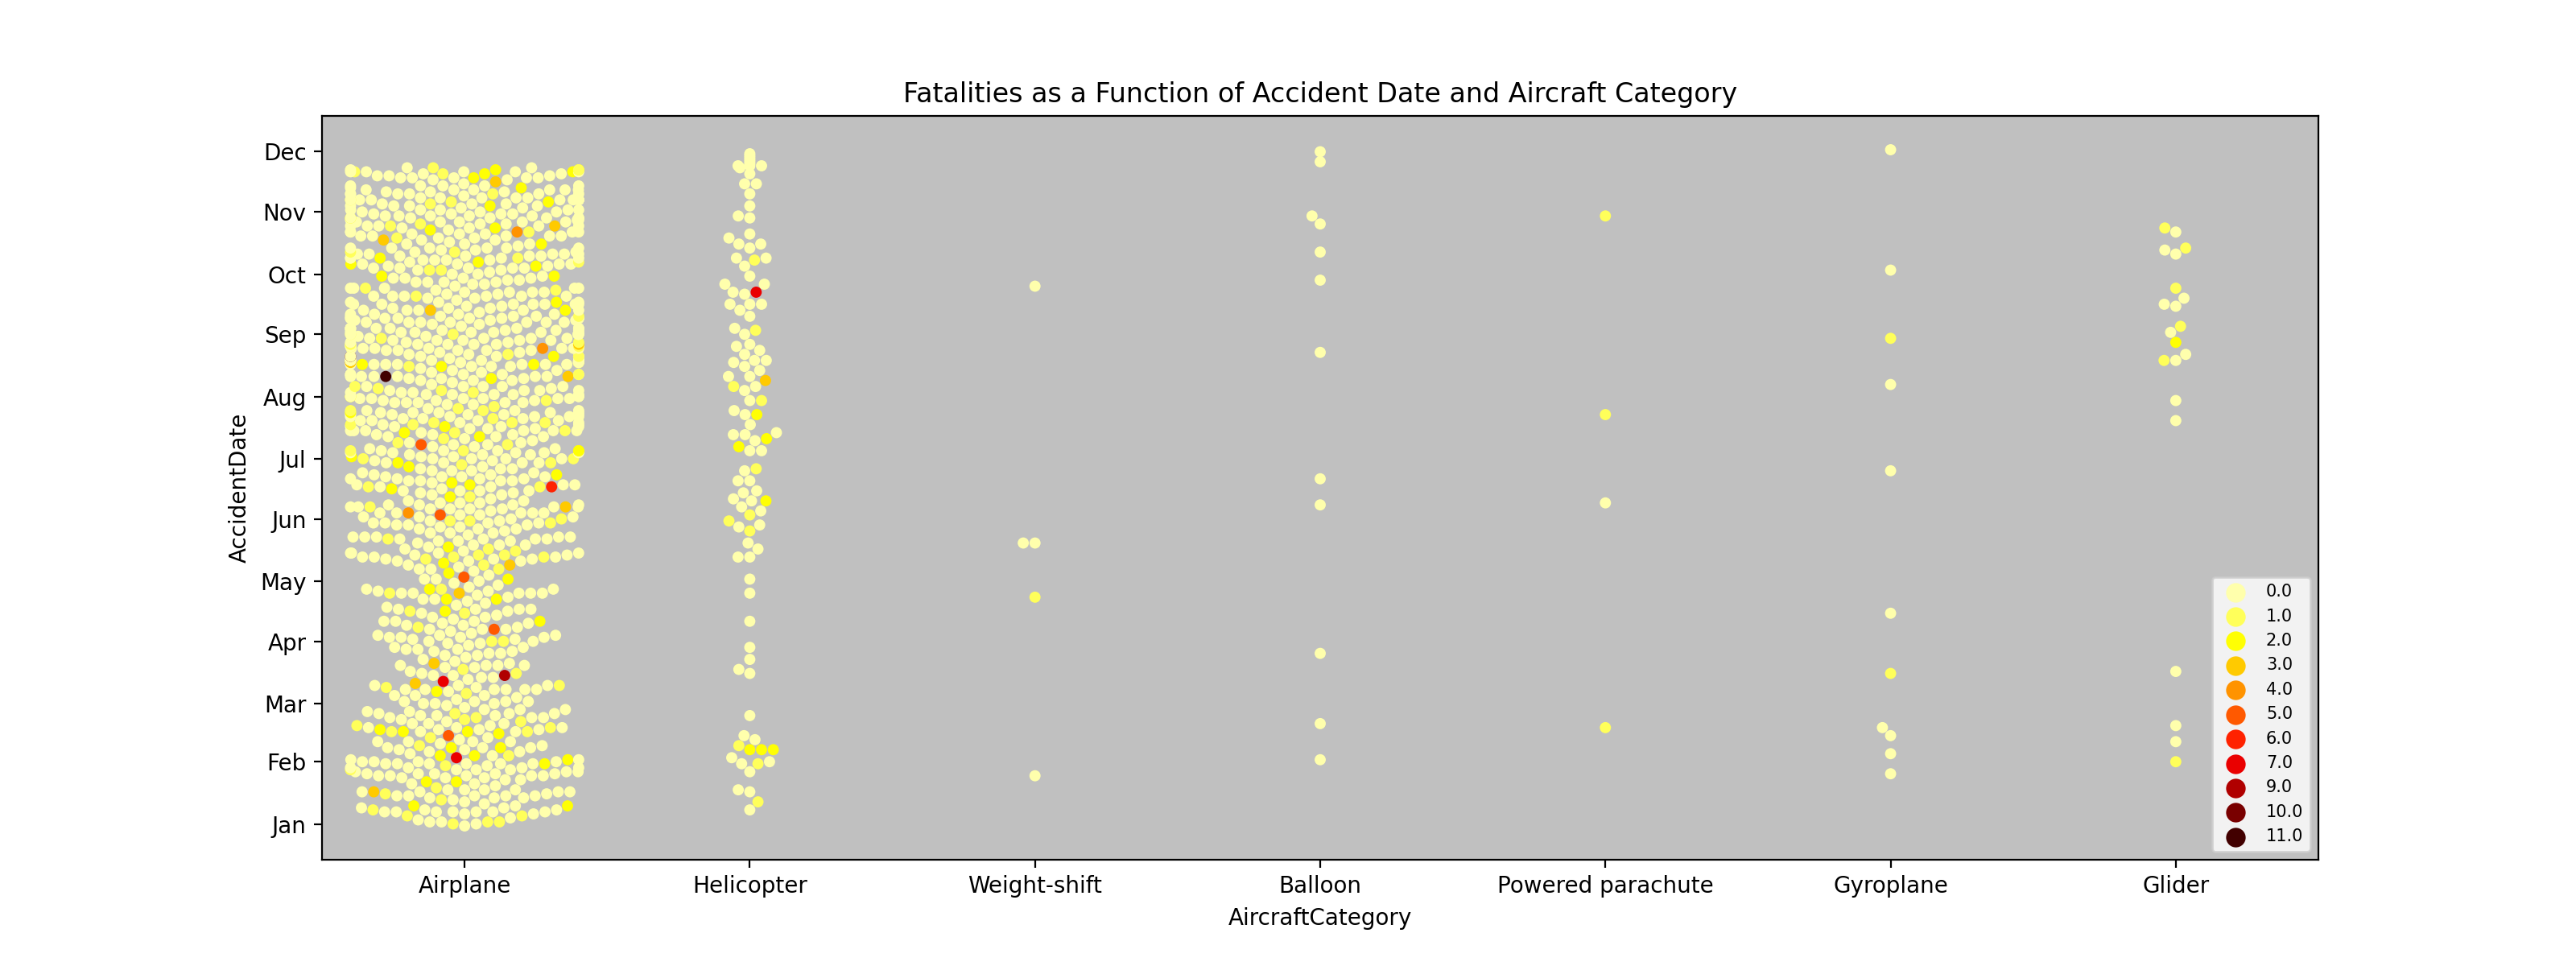

C:\Users\brand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Fatalities as a Function of Accident Date and Aircraft Category')

In [42]:
%matplotlib notebook

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,1,1)

sns.swarmplot(data=df, x='AircraftCategory', y='AccidentDate', hue='FatalInjuries', palette='hot_r')
ax1.set_facecolor('silver')
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

ax1.set_yticks(month_starts)
ax1.set_yticklabels(month_names)
plt.legend(loc='lower right', prop={'size': 7.5})
plt.title('Fatalities as a Function of Accident Date and Aircraft Category')

This graph shows the number of accidents per day for each aircraft throughout 2019. The darker color of the circle, the higher the fatalities in that accident.

<IPython.core.display.Javascript object>


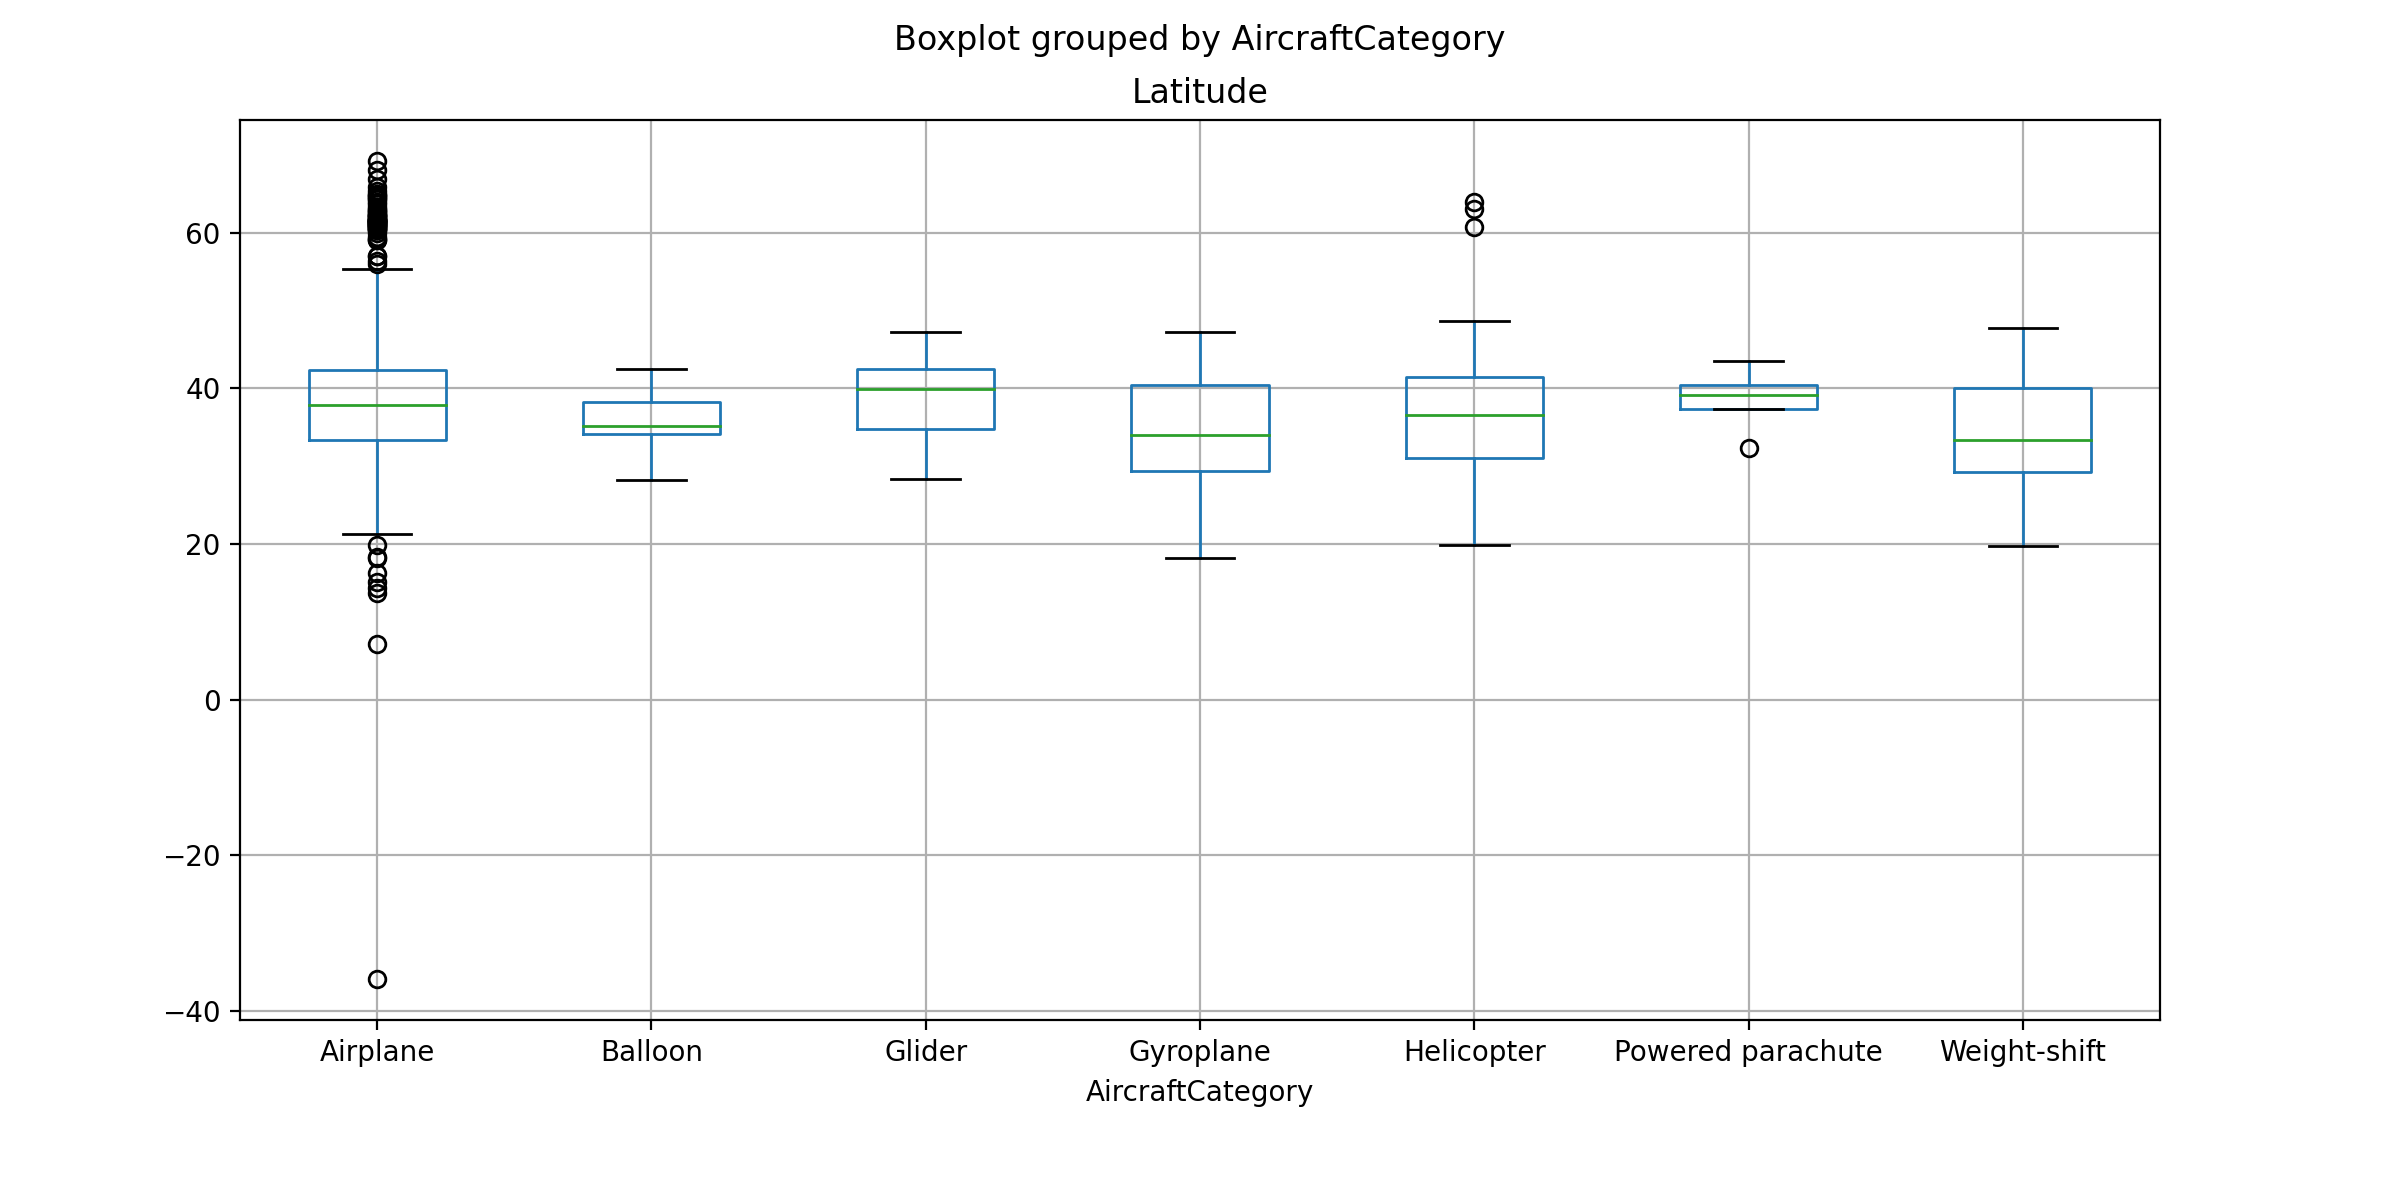

In [43]:
%matplotlib notebook
ax = df.boxplot(column='Latitude', by = 'AircraftCategory', figsize=(12,6)) # group by class

This box plot shows the distribution of accidents on latitude divided by aircraft category

<IPython.core.display.Javascript object>


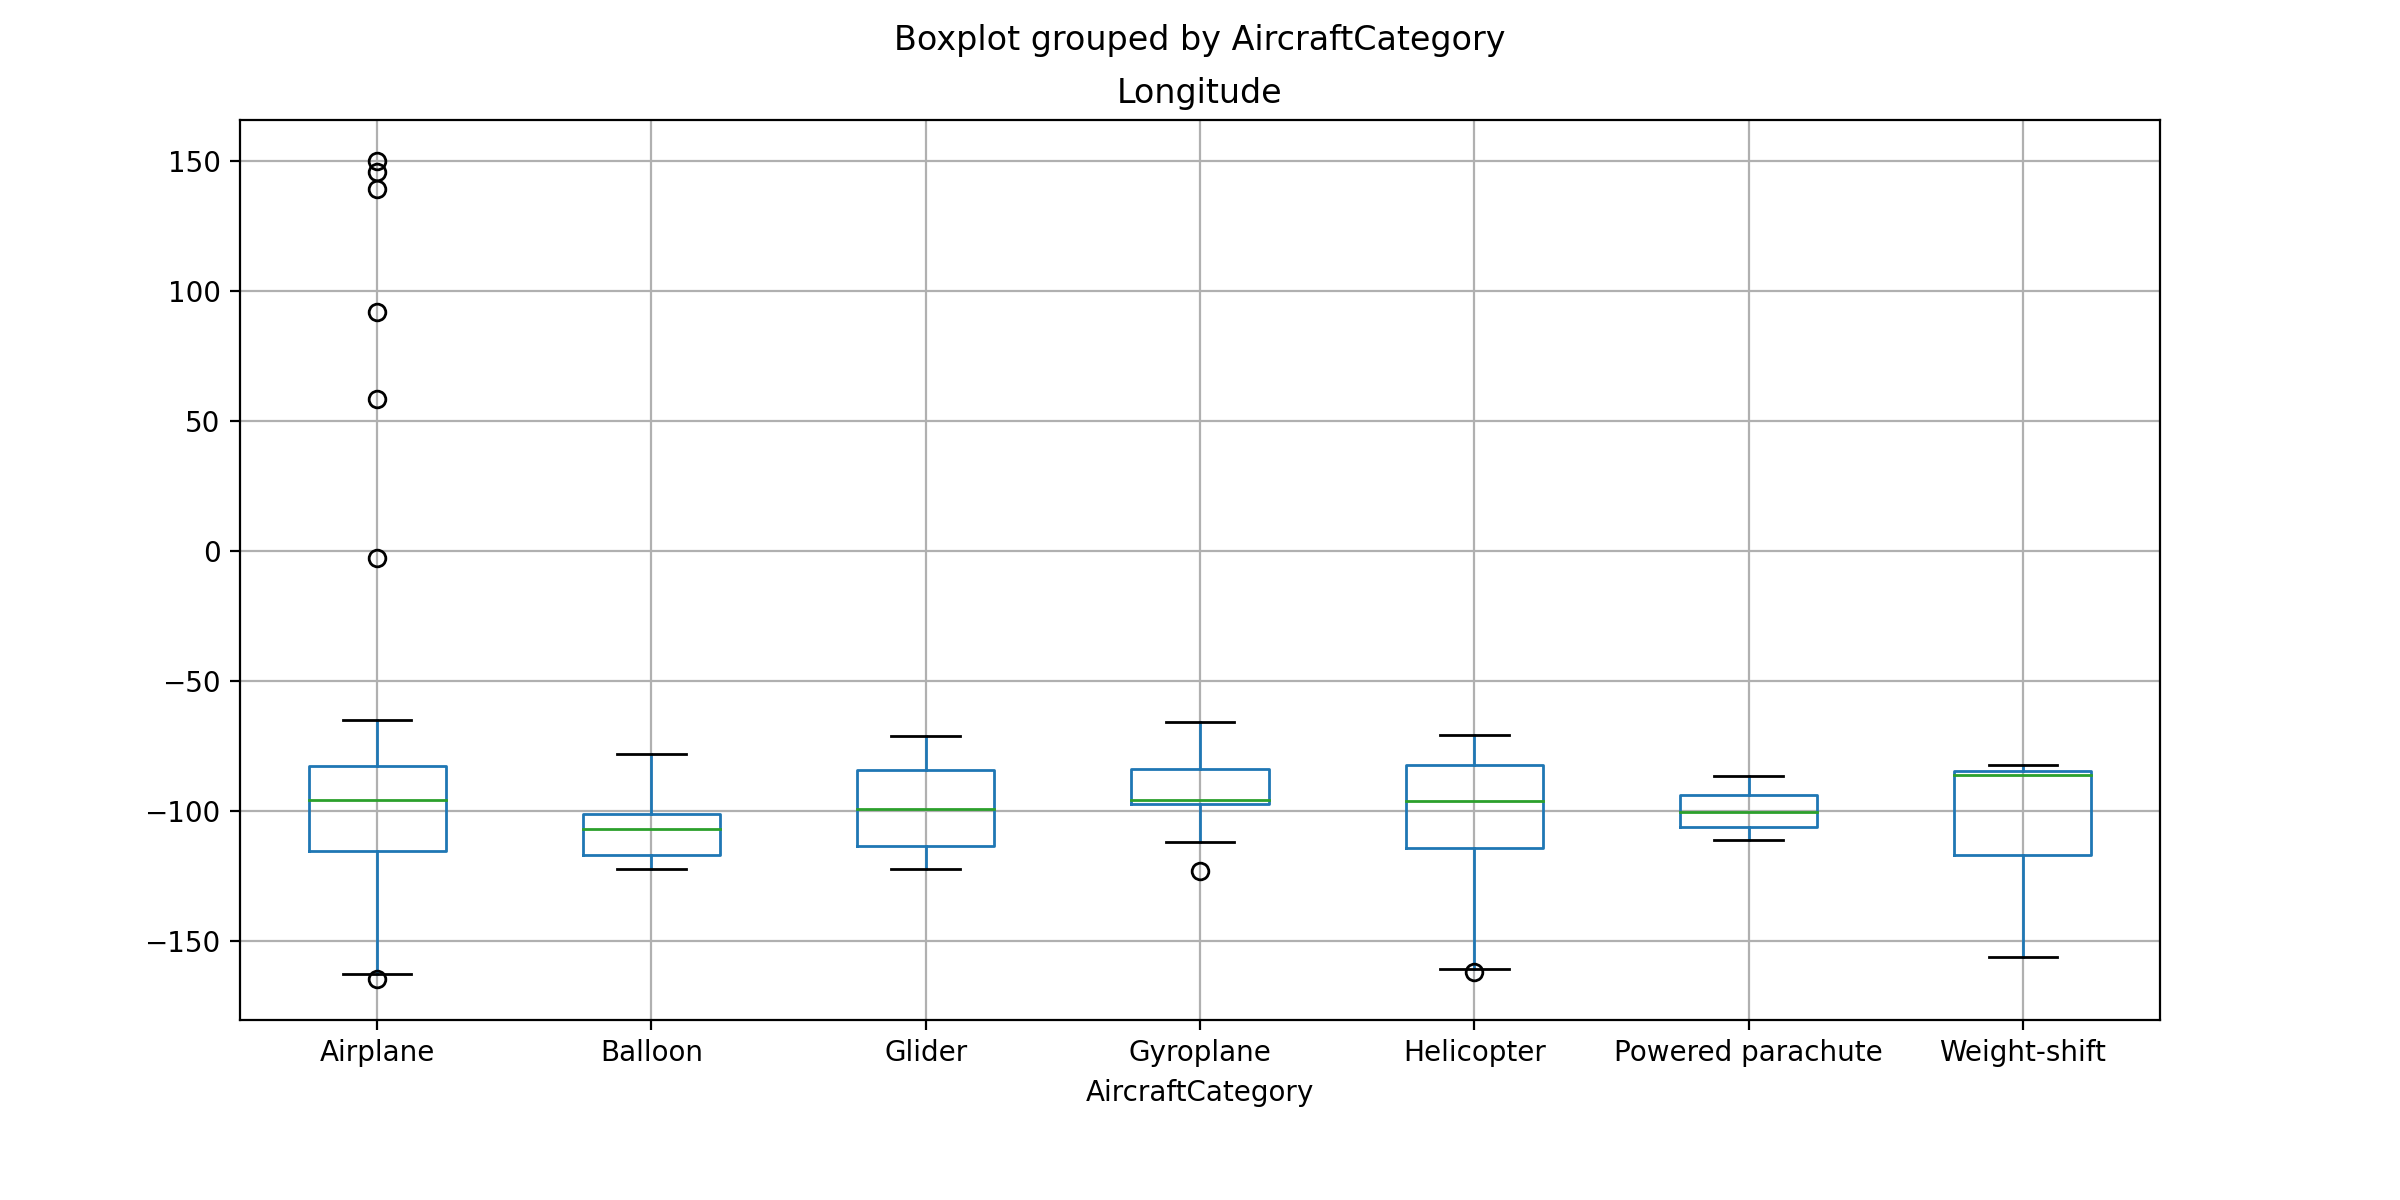

In [44]:
%matplotlib notebook
ax = df.boxplot(column='Longitude', by = 'AircraftCategory', figsize=(12,6)) # group by class

This box plot shows the distribution of accidents on longitude divided by aircraft category